### Setup

In [1]:
import numpy as np
from numpy import shape

from datetime import date

import matplotlib.pyplot as plt

from datetime import datetime
from pytz import timezone

# package to list files in directory
import glob

from tensorflow import reshape

2022-08-25 10:25:18.300631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 10:25:18.300662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
%run '/home/jovyan/rna/_functions/functions.py'

### Load data

In [14]:
# Readout all files contained in the `X_images`- and `O_images`-folder 
all_X_files = glob.glob("/home/jovyan/rna/Constructed/data/raw_images/X_images/*")
all_O_files = glob.glob("/home/jovyan/rna/Constructed/data/raw_images/O_images/*")

In [17]:
# Helperfunction to load in the imagefiles
def read_png_image(filepath):
    return np.mean(plt.imread(filepath), axis = 2)

In [21]:
# Load all X- and O-images
X_images = list(map(read_png_image, all_X_files))
O_images = list(map(read_png_image, all_O_files))

In [22]:
# Reshape square matrices into rowvectors
from tensorflow import reshape

dim_X = shape(X_images)
X_images = reshape(X_images, shape = [dim_X[0], dim_X[1]*dim_X[2]])

dim_O = shape(O_images)
O_images = reshape(O_images, shape = [dim_O[0], dim_O[1]*dim_O[2]])

In [25]:
Y = np.concatenate((np.full(dim_X[0], "X", dtype = "str"), np.full(dim_O[0], "O", dtype = "str")))

### Save images combined into one CSV

In [26]:
data_combined = np.concatenate((X_images, O_images), axis = 0)

In [30]:
folderpath_data_combined = "/home/jovyan/rna/Constructed/data/combined_data/"

# Save data_combined
np.savetxt(folderpath_data_combined + "constructed_images_combined_" + str(len(data_combined)) + "_2022_08_25.csv", data_combined, delimiter=",")

# Save labels
np.savetxt(folderpath_data_combined + "constructed_labels_" + str(len(data_combined)) + "_2022_08_25.csv", Y, delimiter=",", fmt = "%s")

### Descriptive analysis

In [28]:
print(f"#X-Images: {len(X_images)}")
print(f"#O-Images: {len(O_images)}")

#X-Images: 30
#O-Images: 30


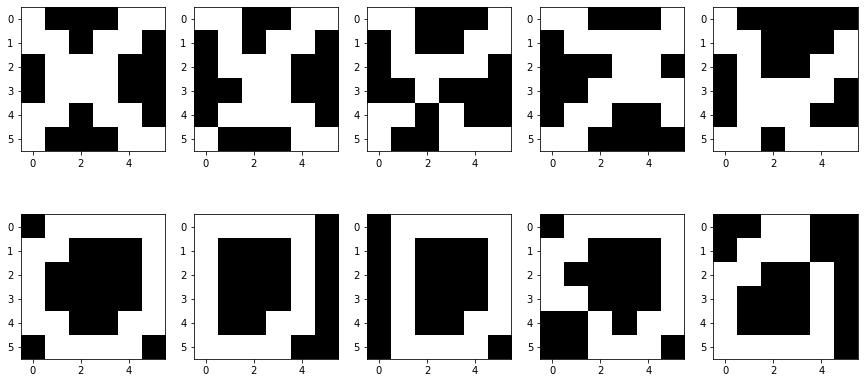

In [103]:
# Image examples
fig, ax = plt.subplots(2,5, figsize = (15,7))

for index_row in range(2):
    for index_col in range(5):
        if index_row == 0:
            ax[index_row, index_col].imshow(reshape(X_images[index_col],(6,6)), cmap = "binary")
        elif index_row == 1:
            ax[index_row, index_col].imshow(reshape(O_images[index_col],(6,6)), cmap = "binary")